In [1]:
from pathlib import Path

import keras.regularizers
import numpy as np
from keras.preprocessing import image

2022-05-24 21:15:48.449996: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-24 21:15:48.450022: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
def load_data():
    p = Path("./flowers/")

    dirs = p.glob("*")

    image_data = []
    labels = []

    image_paths = []

    labels_dict = {"daisy": 0, "dandelion": 1, "rose": 2, "sunflower": 3, "tulip": 4}

    for folder_dir in dirs:
        label = str(folder_dir).split('/')[-1]
        # print(label)

        cnt = 0
        # print(folder_dir)

        # Iterate over folder_dir and pick all images of flowers

        for img_path in folder_dir.glob("*.jpg"):
            # print(img_path)
            img = image.load_img(img_path, target_size=(64, 64))
            img_array = image.img_to_array(img)
            image_data.append(img_array)
            labels.append(labels_dict[label])
            cnt += 1
        # print(image_data[0].shape)
        # print(cnt)

    # print(len(image_data))
    # print(len(labels))

    X = np.array(image_data)
    Y = np.array(labels)
    return X, Y

In [3]:
import pandas as pd
import tensorflow as tf
from keras import backend
from keras import models, layers
from keras import regularizers
from keras.utils.np_utils import to_categorical
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
X, y = load_data()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = to_categorical(y_train, 5)
y_test = to_categorical(y_test, 5)

backend.clear_session()

np.random.seed(42)
tf.random.set_seed(42)

model = models.Sequential()
model.add(layers.Conv2D(64, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(64, 64, 3)))
model.add(layers.Conv2D(64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.MaxPooling2D((2, 2), strides=2))
model.add(layers.Conv2D(128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(layers.Conv2D(128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.MaxPooling2D((2, 2), strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.L2(0.01)))
model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.L2(0.01)))
model.add(layers.Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 dropout (Dropout)           (None, 64, 64, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 128)       147584    
                                                        

Epoch 1/30
189/189 [==============================] - 80s 418ms/step - loss: 1.9696 - accuracy: 0.3208
Epoch 2/30
189/189 [==============================] - 79s 418ms/step - loss: 1.4131 - accuracy: 0.4611
Epoch 3/30
189/189 [==============================] - 79s 417ms/step - loss: 1.2492 - accuracy: 0.5475
Epoch 4/30
189/189 [==============================] - 79s 418ms/step - loss: 1.1348 - accuracy: 0.6147
Epoch 5/30
189/189 [==============================] - 79s 420ms/step - loss: 1.0598 - accuracy: 0.6521
Epoch 6/30
189/189 [==============================] - 77s 407ms/step - loss: 0.9951 - accuracy: 0.6806
Epoch 7/30
189/189 [==============================] - 75s 397ms/step - loss: 0.9496 - accuracy: 0.6935
Epoch 8/30
189/189 [==============================] - 77s 405ms/step - loss: 0.9623 - accuracy: 0.7094
Epoch 9/30
189/189 [==============================] - 80s 424ms/step - loss: 0.8866 - accuracy: 0.7345
Epoch 10/30
189/189 [==============================] - 80s 421ms/step - l

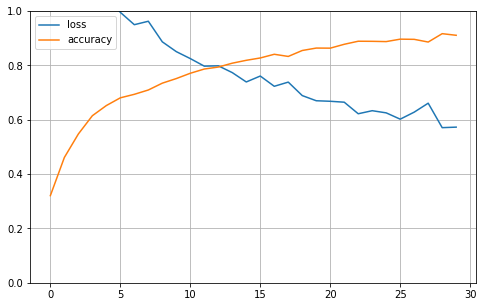

In [19]:
history = model.fit(X_train, y_train, epochs=30, batch_size=16)

# Once the training is complete, plot the loss and accuracy metrics of the model
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [20]:
model.evaluate(X_test, y_test)

41/41 [==============================] - 5s 127ms/step - loss: 1.2598 - accuracy: 0.6512


[1.259824275970459, 0.6512345671653748]